In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
#from scipy.special import boxcox1px
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
import scipy.special as ss

In [3]:
%matplotlib inline

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
len(train)

1460

In [5]:
train = train.drop(train[(train['GrLivArea']>4000)].index)
#train = train[train.LotFrontage < 300]
train.reset_index(drop=True, inplace=True)

In [6]:
len(train)

1456

In [7]:
train_ID = train.Id
test_ID = test.Id

In [8]:
train.drop('Id',inplace=True, axis=1)
test.drop('Id',inplace=True, axis=1)

In [9]:
print(train.columns)
print(test.columns)
print(train.shape, test.shape)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [10]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1456.000000,1197.000000,1456.000000,1456.000000,1456.000000,1456.00000,1456.000000,1448.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,56.888736,69.693400,10448.784341,6.088599,5.576236,1971.18544,1984.819368,102.087707,436.991071,46.677198,...,93.833791,46.221154,22.014423,3.418956,15.102335,2.055632,43.608516,6.326236,2007.817308,180151.233516
std,42.358363,23.054474,9860.763449,1.369669,1.113966,30.20159,20.652143,177.338930,430.255052,161.522376,...,125.192349,65.352424,61.192248,29.357056,55.828405,35.383772,496.799265,2.698356,1.329394,76696.592530
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.00000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7538.750000,5.000000,5.000000,1954.00000,1966.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,69.000000,9468.500000,6.000000,5.000000,1972.00000,1993.500000,0.000000,381.000000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11588.000000,7.000000,6.000000,2000.00000,2004.000000,164.250000,706.500000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.00000,2010.000000,1600.000000,2188.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,625000.000000


Skewness: 1.5659592925562151
Kurtosis: 3.8852828233316745


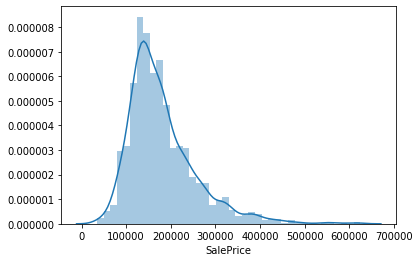

In [11]:
sns.distplot(train.SalePrice)
print("Skewness: {}".format(train.SalePrice.skew()))
print('Kurtosis: {}'.format(train.SalePrice.kurt()))

In [12]:
from scipy.stats import skew, norm

Skewness: 0.9423324019040125
Kurtosis: 1.5862271800996142


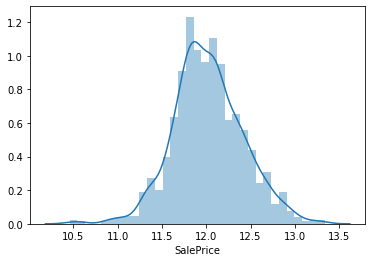

In [13]:
sns.distplot(np.log(train.SalePrice))
print("Skewness: {}".format(np.log1p(train.SalePrice.skew())))
print('Kurtosis: {}'.format(np.log1p(train.SalePrice.kurt())))

In [14]:
y_original = train.SalePrice
train.drop('SalePrice', axis=1, inplace=True)
y_original.shape

(1456,)

In [15]:
train.shape

(1456, 79)

In [16]:
data = pd.concat((train,test)).reset_index(drop=True)
print(data.shape)

(2915, 79)


In [17]:
data_nans = data.isnull().sum()
data_nans = data_nans[data_nans > 0]
data_nans.sort_values(ascending=False)

PoolQC          2907
MiscFeature     2810
Alley           2717
Fence           2345
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
Electrical         1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [18]:
strings = ['MSSubClass', 'YrSold', 'MoSold']
for var in strings:
    data[var] = data[var].apply(str)

In [19]:
groups = ['Exterior1st','Exterior2nd','SaleType','Electrical','KitchenQual']
for group in groups:
    mode = data[group].mode()[0]
    print(mode)
    data[group] = data[group].fillna(mode)

VinylSd
VinylSd
WD
SBrkr
TA


In [20]:
data_nans = data.isnull().sum()
data_nans = data_nans[data_nans > 0]
data_nans.sort_values(ascending=False)

PoolQC          2907
MiscFeature     2810
Alley           2717
Fence           2345
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageQual       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [21]:
data.MSZoning = data.MSZoning.fillna('RL')

In [22]:
data_nans = data.isnull().sum()
data_nans = data_nans[data_nans > 0]
data_nans.sort_values(ascending=False)

PoolQC          2907
MiscFeature     2810
Alley           2717
Fence           2345
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
GarageCars         1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [23]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',"PoolQC"
           ,'Alley','Fence','MiscFeature','FireplaceQu','MasVnrType','Utilities']:
    data[col] = data[col].fillna('None')

In [24]:
data_nans = data.isnull().sum()
data_nans = data_nans[data_nans > 0]
data_nans.sort_values(ascending=False)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
Functional        2
BsmtHalfBath      2
BsmtFullBath      2
GarageArea        1
GarageCars        1
TotalBsmtSF       1
BsmtUnfSF         1
BsmtFinSF2        1
BsmtFinSF1        1
dtype: int64

In [25]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','MasVnrArea','BsmtFinSF1','BsmtFinSF2'
           ,'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BsmtUnfSF','TotalBsmtSF'):
    data[col] = data[col].fillna(0)

In [26]:
data_nans = data.isnull().sum()
data_nans = data_nans[data_nans > 0]
data_nans.sort_values(ascending=False)

LotFrontage    486
Functional       2
dtype: int64

In [27]:
data.Functional = data.Functional.fillna('Typ')

In [28]:
data_nans = data.isnull().sum()
data_nans = data_nans[data_nans > 0]
data_nans.sort_values(ascending=False)

LotFrontage    486
dtype: int64

In [29]:
cat_features = data.select_dtypes(include=['object']).columns
print(cat_features)
num_features = data.select_dtypes(exclude=['object']).columns
print(num_features)

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')
Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'B

In [30]:
feat_num = data[num_features]
feat_cat = data[cat_features]

In [31]:
skewness = feat_num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal          21.932147
PoolArea         18.701829
LotArea          13.123758
LowQualFinSF     12.080315
3SsnPorch        11.368094
KitchenAbvGr      4.298845
BsmtFinSF2        4.142863
EnclosedPorch     4.000796
ScreenPorch       3.943508
BsmtHalfBath      3.942892
MasVnrArea        2.600697
OpenPorchSF       2.529245
WoodDeckSF        1.848285
1stFlrSF          1.253011
GrLivArea         0.977860
BsmtFinSF1        0.974138
BsmtUnfSF         0.920135
2ndFlrSF          0.843237
TotRmsAbvGrd      0.749579
Fireplaces        0.725958
HalfBath          0.698770
TotalBsmtSF       0.662657
BsmtFullBath      0.622820
OverallCond       0.569143
BedroomAbvGr      0.328129
GarageArea        0.217748
OverallQual       0.181902
FullBath          0.159917
GarageCars       -0.219402
YearRemodAdd     -0.449113
YearBuilt        -0.598087
GarageYrBlt      -3.903046
LotFrontage            NaN
dtype: float64

In [32]:
skewness = skewness[abs(skewness) > 0.5]
skewed_features = skewness.index
for feat in skewed_features:
    feat_num[feat] = ss.boxcox1p(feat_num[feat], boxcox_normmax(feat_num[feat] + 1))
    data[feat] = ss.boxcox1p(data[feat], boxcox_normmax(data[feat] + 1))

In [33]:
skewness = feat_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]

print("There are {} skewed numerical features after Box Cox transform".format(skewness.shape[0]))
print("Mean skewnees: {}".format(np.mean(skewness)))
skewness.sort_values(ascending=False)

There are 17 skewed numerical features after Box Cox transform
Mean skewnees: 3.541387582036029


PoolArea         16.290037
3SsnPorch         8.858944
LowQualFinSF      8.489627
MiscVal           5.236070
BsmtHalfBath      3.790877
KitchenAbvGr      3.776776
ScreenPorch       3.151351
BsmtFinSF2        2.577190
EnclosedPorch     2.148107
MasVnrArea        0.977442
2ndFlrSF          0.892739
WoodDeckSF        0.786377
HalfBath          0.734482
GarageYrBlt       0.701509
OpenPorchSF       0.621703
BsmtFullBath      0.616950
Fireplaces        0.553409
dtype: float64

In [34]:
data['TotalSF'] = data.TotalBsmtSF + data['1stFlrSF'] + data['2ndFlrSF']
data['TotalBath'] = data.FullBath + 0.5 * data.HalfBath + data.BsmtFullBath + 0.5 * data.BsmtHalfBath
data['TotalPorch'] = data.OpenPorchSF + data['3SsnPorch'] + data.EnclosedPorch + data.ScreenPorch + data.WoodDeckSF

In [35]:
data['HasPool'] = data.PoolArea.apply(lambda x: 1 if x > 0 else 0)
data['HasGarage'] = data.GarageArea.apply(lambda x: 1 if x > 0 else 0)
data['HasBsmt'] = data.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
data['HasFirePl'] = data.Fireplaces.apply(lambda x: 1 if x > 0 else 0)

data = data.drop(['MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'BsmtFinSF1','2ndFlrSF'], axis=1)

data.shape

(2915, 81)

In [36]:
frontage_median = data.LotFrontage.median()
data.LotFrontage = data.LotFrontage.fillna(frontage_median)

In [37]:
qual_dict = {"None": 0, "Po": 1, "Fa": 2, "TA": 4, "Gd": 7, "Ex": 11}
qual_cols = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", 
             "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"]

for cat in feat_cat:
    if cat in qual_cols:
        data[cat] = data[cat].map(qual_dict).astype('int64')
    else:
        data[cat] = data[cat].astype('category')

In [38]:
train = data.iloc[:len(y_original),:]
test = data.iloc[len(y_original):,:]
print(train.shape,y_original.shape, test.shape)

(1456, 81) (1456,) (1459, 81)


In [39]:
train['SalePrice'] = y_original

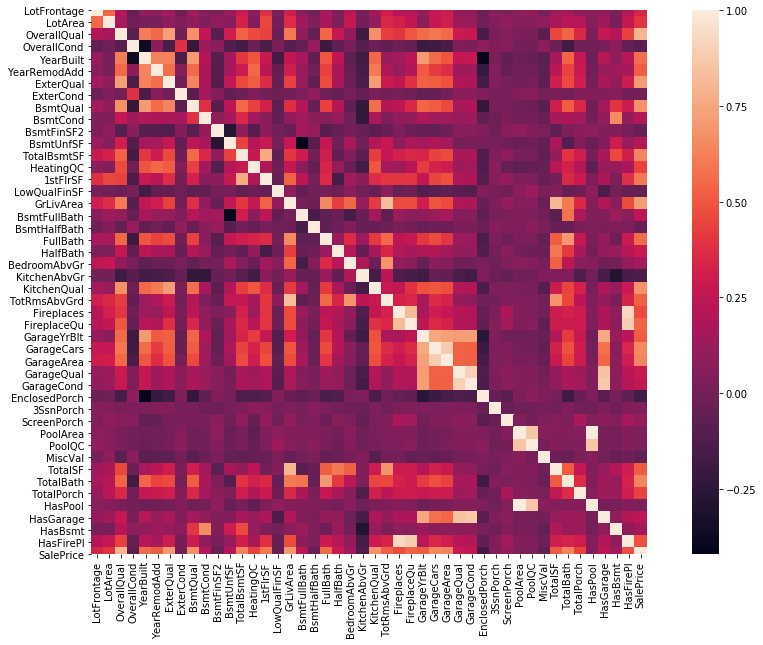

In [40]:
corr_matrix = train.corr()
f, ax = plt.subplots(figsize=(16,10))
sns.heatmap(corr_matrix, vmax=1, square=True);

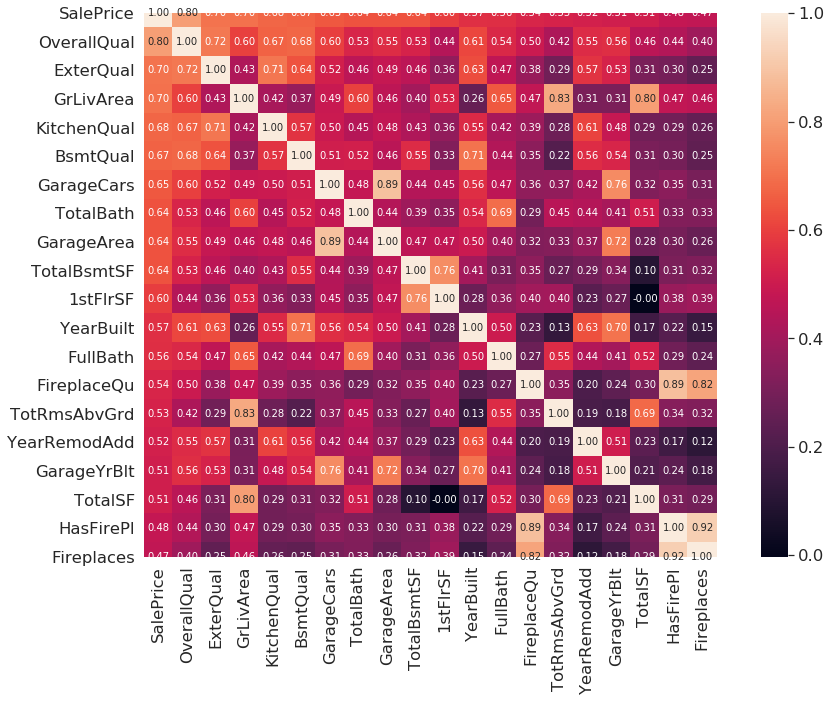

In [41]:
corr_num = 20
cols_corr = corr_matrix.nlargest(corr_num, 'SalePrice')['SalePrice'].index
corr_mat_sales = np.corrcoef(train[cols_corr].values.T)
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(16,10))
hm = sns.heatmap(corr_mat_sales,cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},yticklabels=cols_corr.values, xticklabels=cols_corr.values)
plt.show()

In [42]:
cols_corr_smal = corr_matrix.nsmallest(corr_num, 'SalePrice')['SalePrice'].index
cols_corr_smal

Index(['EnclosedPorch', 'KitchenAbvGr', 'OverallCond', 'MiscVal',
       'LowQualFinSF', 'BsmtFinSF2', 'BsmtHalfBath', 'ExterCond', 'PoolQC',
       'HasPool', 'PoolArea', '3SsnPorch', 'ScreenPorch', 'HasBsmt',
       'BedroomAbvGr', 'BsmtUnfSF', 'BsmtCond', 'BsmtFullBath', 'HasGarage',
       'GarageCond'],
      dtype='object')

In [43]:
fin_data = pd.get_dummies(data)

In [44]:
len(y_original)

1456

In [45]:
print(fin_data.shape)
y_train = np.log1p(y_original.values)
train = fin_data.iloc[:len(y_original),:]
test = fin_data.iloc[len(y_original):,:]
print(train.shape,y_train.shape,test.shape)

(2915, 294)
(1456, 294) (1456,) (1459, 294)


In [46]:
len(y_train)

1456

In [47]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [48]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [49]:
train.values

array([[65.        , 13.81418253,  7.        , ...,  0.        ,
         1.        ,  0.        ],
       [80.        , 14.09835457,  6.        , ...,  0.        ,
         1.        ,  0.        ],
       [68.        , 14.45606508,  7.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [66.        , 13.96459147,  7.        , ...,  0.        ,
         1.        ,  0.        ],
       [68.        , 14.12549973,  5.        , ...,  0.        ,
         1.        ,  0.        ],
       [75.        , 14.17574444,  5.        , ...,  0.        ,
         1.        ,  0.        ]])

In [50]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [51]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [52]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [53]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [54]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [55]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [56]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1090 (0.0054)



In [57]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1091 (0.0055)



In [58]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 4.8377 (0.0958)



In [59]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1142 (0.0067)



In [60]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1156 (0.0056)



In [61]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [62]:
averaged_models = AveragingModels(models = (ENet, model_lgb, lasso, model_xgb))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1079 (0.0056)



In [63]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [64]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [65]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, model_xgb, model_lgb),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1080 (0.0056)


In [66]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.089073859027664


In [67]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.08100564884585647


In [68]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07319229949133382


In [76]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.05 +
               xgb_train_pred*0.25 + lgb_train_pred*0.70 ))

RMSLE score on train data:
0.07449889736964295


In [81]:
ensemble = np.expm1(stacked_averaged_models.predict(test.values))

In [83]:
ensemble2 = np.exp(stacked_averaged_models.predict(test.values))
sum(ensemble-ensemble2)

-1459.0000000002256

In [73]:
len(ensemble)

1459

In [82]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

In [84]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble2
sub.to_csv('submission2.csv',index=False)